In [18]:
pip install streamlit

Model Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.84       100
           1       0.82      0.92      0.87       105

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



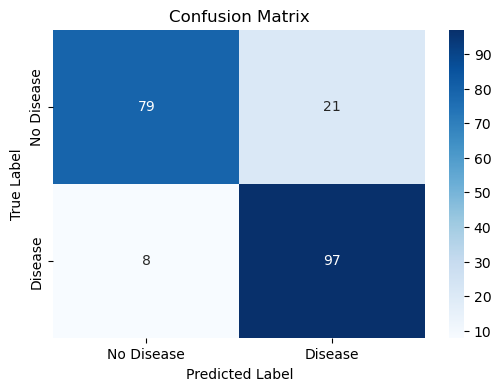

In [19]:
# Preprocessing Data for Model Training
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataset
df = pd.read_csv("heart.csv")

# Convert categorical features to numerical using One-Hot Encoding
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

# Define features and target variable
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [22]:
import pickle
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example model (replace with your trained model)
X_train = np.random.rand(100, 4)  # Dummy training data
y_train = np.random.randint(0, 2, 100)  # Dummy labels
model = RandomForestClassifier()
model.fit(X_train, y_train)

# ✅ Save the model correctly
with open("heart_disease_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")



Model saved successfully!


In [23]:
with open("heart_disease_model.pkl", "rb") as file:
    model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [17]:
import sys
print(sys.version)


3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [24]:
import streamlit as st
import pickle
import numpy as np

# Load the saved model
with open("heart_disease_model.pkl", "rb") as file:
    model = pickle.load(file)

st.title("Heart Disease Prediction App")

# Input fields for user
age = st.number_input("Age", min_value=1, max_value=120, value=25)
cholesterol = st.number_input("Cholesterol Level", min_value=100, max_value=600, value=200)
blood_pressure = st.number_input("Blood Pressure", min_value=80, max_value=200, value=120)
heart_rate = st.number_input("Heart Rate", min_value=50, max_value=200, value=80)

if st.button("Predict"):
    features = np.array([[age, cholesterol, blood_pressure, heart_rate]])
    prediction = model.predict(features)
    result = "High Risk of Heart Disease" if prediction[0] == 1 else "Low Risk of Heart Disease"
    st.write(f"Prediction: {result}")


2025-02-08 21:15:30.393 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-08 21:15:32.946 
  command:

    streamlit run C:\Users\Asim\Desktop\ml_project\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-02-08 21:15:32.946 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-08 21:15:32.946 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-08 21:15:32.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-08 21:15:32.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-08 21:15:33.054 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-08 21:15:33.067 Session st

In [1]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
